In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../..')
import lib.variational_method.eigenvalues as eigenvalues
import numpy as np
%matplotlib inline

# Вывод аналитической формулы для частотной характеристики

Исходное тождество:
$$(u_x, \phi_x) + (u_y, \phi_y) + \alpha(u, \phi) = (g_1, \phi_x) + (g_2, \phi_y)$$

Модифицированный метод:
$B_2 \Lambda_1 u + B_1 \Lambda_2 u + \alpha B_1 B_2 u + \gamma \Lambda_1 \Lambda_2 u = B_1 G_1 g_1 + G_2 B_2 g_2$

Если точное решение $v(x,y) = e^{ikx}e^{ily}, k \neq 0, l \neq 0$

$g_1 = v_x, g_2 = v_y$, то:

$(g_1, \phi_x) = h \lambda_k e^{ikx_n} \frac{h}{l^2} \lambda_l e^{ily_m}$

$(g_2, \phi_y) = h \lambda_l e^{ily_m} \frac{h}{k^2} \lambda_k e^{ikx_n}$

Теперь рассмотрим приближеное решение: $u(x,y) = u_{kl} e^{ikx}e^{ily}$

В левую часть исходного равенства подставляется точное решение,а в правую приближенное.

Получаем чатсотную характеристику
$H_{kl} = \frac{1}{u_{kl}} = \frac{(\frac{1}{k^2} + \frac{1}{l^2})\lambda_k\lambda_l}{\mu_l \lambda_k + \mu_k \lambda_l + \alpha \mu_k \mu_l + \gamma \lambda_k \lambda_l}$

In [2]:
def diag_H_kk(n, alpha, gamma):
    h = 2 * np.pi / n**2
    lambd = eigenvalues.get_lambda(n, h)
    mu = eigenvalues.get_mu(n, h)
    res = np.zeros(n - 1)
    for i in range(1, n):
        res[i - 1] = (2 / i**2 * lambd[i]**2) / (2 * mu[i] * lambd[i] + alpha * mu[i]**2 + gamma * lambd[i]**2)
    return res

(0, 1.5)

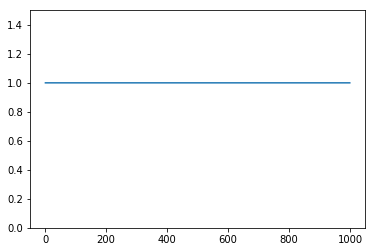

In [3]:
y = diag_H_kk(1000, 0.0001, 0)
x = np.arange(1, 1000)
plt.plot(x, y)
plt.ylim(0,1.5)